Like SVMs, Decision Trees are versatile Machine Learning algorithms that can
perform both classification and regression tasks, and even multioutput tasks.
They are powerful algorithms, capable of fitting complex datasets.

# Training and Visualizing a Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
out_file= "iris_tree.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

# Making Predictions
Let’s see how the tree represented in Figure 6-1 makes predictions. Suppose you
find an iris flower and you want to classify it. You start at the root node (depth 0,
at the top): this node asks whether the flower’s petal length is smaller than 0.8
cm. If it is, then you move down to the root’s left child node (depth 1, left). In
this case, it is a leaf node (i.e., it does not have any child nodes), so it does not
ask any questions: simply look at the predicted class for that node, and the
Decision Tree predicts that your flower is an Iris setosa (class=setosa).
Now suppose you find another flower, and this time the petal length is greater
than 2.45 cm. You must move down to the root’s right child node (depth 1,
right), which is not a leaf node, so the node asks another question: is the petal
width smaller than 1.75 cm? If it is, then your flower is most likely an Iris
versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). It’s
really that simple


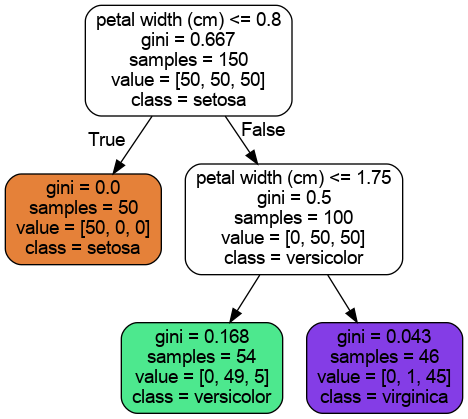

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes
always have two children (i.e., questions only have yes/no answers). However, other
algorithms such as ID3 can produce Decision Trees with nodes that have more than two
children.

# MODEL INTERPRETATION: WHITE BOX VERSUS BLACK BOX
Decision Trees are intuitive, and their decisions are easy to interpret. Such
models are often called white box models. In contrast, as we will see,
Random Forests or neural networks are generally considered black box
models. They make great predictions, and you can easily check the
calculations that they performed to make these predictions; nevertheless, it is
usually hard to explain in simple terms why the predictions were made. For
example, if a neural network says that a particular person appears on a
picture, it is hard to know what contributed to this prediction: did the model
recognize that person’s eyes? Their mouth? Their nose? Their shoes? Or
even the couch that they were sitting on? Conversely, Decision Trees provide
nice, simple classification rules that can even be applied manually if need be
(e.g., for flower classification).

# Estimating Class Probabilities
A Decision Tree can also estimate the probability that an instance belongs to a
particular class k. First it traverses the tree to find the leaf node for this instance,
and then it returns the ratio of training instances of class k in this node.

In [29]:
tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

array([1])

As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an
optimum split at the top level, then repeats the process at each subsequent level. It does not
check whether or not the split will lead to the lowest possible impurity several levels down. A
greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be
optimal.
Unfortunately, finding the optimal tree is known to be an NP-Complete problem:  it requires
O(exp(m)) time, making the problem intractable even for small training sets. This is why we must settle for a “reasonably good” solution.

# Gini Impurity or Entropy?
So, should you use Gini impurity or entropy? The truth is, most of the time it
does not make a big difference: they lead to similar trees. Gini impurity is
slightly faster to compute, so it is a good default. However, when they differ,
Gini impurity tends to isolate the most frequent class in its own branch of the
tree, while entropy tends to produce slightly more balanced trees.

# Regularization Hyperparameters
Decision Trees make very few assumptions about the training data (as opposed
to linear models, which assume that the data is linear, for example). If left
unconstrained, the tree structure will adapt itself to the training data, fitting it
very closely—indeed, most likely overfitting it. Such a model is often called a
nonparametric model, not because it does not have any parameters (it often has a
lot) but because the number of parameters is not determined prior to training, so
the model structure is free to stick closely to the data.In contrast, a parametric
model, such as a linear model, has a predetermined number of parameters, so its
degree of freedom is limited, reducing the risk of overfitting (but increasing the
risk of underfitting).

The
regularization hyperparameters depend on the algorithm used, but generally you
can at least restrict the maximum depth of the Decision Tree. In Scikit-Learn,
this is controlled by the max_depth hyperparameter (the default value is None,
which means unlimited). Reducing max_depth will regularize the model and
thus reduce the risk of overfitting

# NOTE
Other algorithms work by first training the Decision Tree without restrictions, then pruning
(deleting) unnecessary nodes. A node whose children are all leaf nodes is considered
unnecessary if the purity improvement it provides is not statistically significant. Standard
statistical tests, such as the χ  test (chi-squared test), are used to estimate the probability that
the improvement is purely the result of chance (which is called the null hypothesis). If this
probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a
hyperparameter), then the node is considered unnecessary and its children are deleted. The
pruning continues until all unnecessary nodes have been pruned.

# Regression
Decision Trees are also capable of performing regression tasks. Let’s build a
regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it
on a noisy quadratic dataset with max_depth=2

In [37]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2)

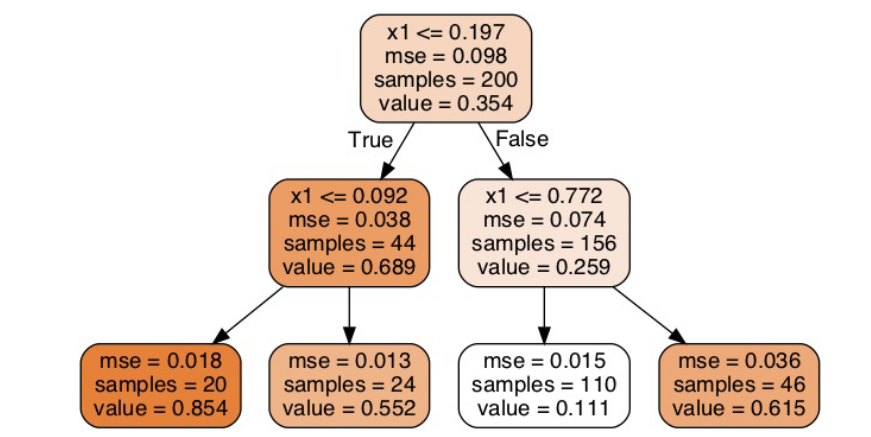

This tree looks very similar to the classification tree you built earlier. The main
difference is that instead of predicting a class in each node, it predicts a value.
For example, suppose you want to make a prediction for a new instance with x
= 0.6. You traverse the tree starting at the root, and you eventually reach the leaf
node that predicts value=0.111. This prediction is the average target value of
the 110 training instances associated with this leaf node, and it results in a mean
squared error equal to 0.015 over these 110 instances.

The CART algorithm works mostly the same way as earlier, except that instead
of trying to split the training set in a way that minimizes impurity, it now tries to
split the training set in a way that minimizes the MSE. Equation 6-4 shows the
cost function that the algorithm tries to minimize.

# Instability
Hopefully by now you are convinced that Decision Trees have a lot going for
them: they are simple to understand and interpret, easy to use, versatile, and
powerful. However, they do have a few limitations.

First, as you may have
noticed, Decision Trees love orthogonal decision boundaries (all splits are
perpendicular to an axis), which makes them sensitive to training set rotation.
For example, Figure 6-7 shows a simple linearly separable dataset: on the left, a
Decision Tree can split it easily, while on the right, after the dataset is rotated by
45°, the decision boundary looks unnecessarily convoluted.

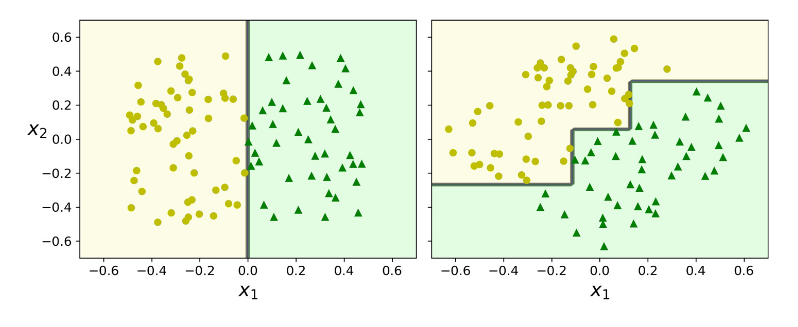

Although both
Decision Trees fit the training set perfectly, it is very likely that the model on the
right will not generalize well. One way to limit this problem is to use Principal
Component Analysis (see Chapter 8), which often results in a better orientation
of the training data.

More generally, the main issue with Decision Trees is that they are very sensitive
to small variations in the training data. For example, if you just remove the
widest Iris versicolor from the iris training set (the one with petals 4.8 cm long
and 1.8 cm wide) and train a new Decision Tree, you may get the model
represented in Figure 6-8. As you can see, it looks very different from the
previous Decision Tree (Figure 6-2). Actually, since the training algorithm used
by Scikit-Learn is stochastic,  you may get very different models even on the
same training data (unless you set the random_state hyperparameter)

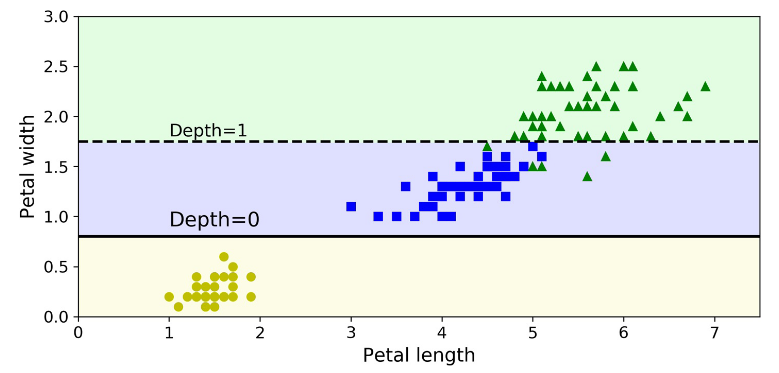